In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math

In [2]:
profile_df = pd.read_csv("../kicker_data/KickerFieldProfile.dat",sep='\t',names=['x','By_noDip','By_Dip'],skipfooter=1, engine='python')

In [3]:
n_sigma = 23
emit_x = 0.27e-9
beta_x_kicker = 193
phase_at_mki = 70
sigma = np.sqrt(emit_x*beta_x_kicker)
x_injection = np.cos(phase_at_mki/180*np.pi)*n_sigma * sigma
fit_boundary_x = 0.7 #x value at which data is trimmed for two fitting regions

In [4]:
profile_df["x_meters"]=profile_df["x"]/1000
profile_df["By_Dip_Tesla"]=profile_df["By_Dip"]*1e-4
profile_df["By_noDip_Tesla"]=profile_df["By_noDip"]*1e-4

index = abs(profile_df['x_meters'] - x_injection).idxmin()

profile_df["By_Dip_Tesla_normalised"]= profile_df["By_Dip_Tesla"]/profile_df["By_Dip_Tesla"].loc[index]
profile_df["By_noDip_Tesla_normalised"]= profile_df["By_noDip_Tesla"]/profile_df["By_noDip_Tesla"].loc[index]

In [5]:
center_df = profile_df[abs(profile_df['x']) < fit_boundary_x]
kicker_df = profile_df[abs(profile_df['x']) > fit_boundary_x]

In [6]:
def return_fitted_poly(df, xcolumn, ycolumn, deg):
    polynomials,_,_,_,_= np.polyfit(df[xcolumn], df[ycolumn], deg=deg,full=True)
    return np.poly1d(polynomials)

In [7]:
fitProfile = return_fitted_poly(profile_df,"x_meters","By_Dip_Tesla_normalised",20)

In [8]:
centerFitProfile = return_fitted_poly(center_df,"x_meters","By_Dip_Tesla_normalised",10)

In [9]:
kickerFitProfile = return_fitted_poly(kicker_df,"x_meters","By_Dip_Tesla_normalised",4)

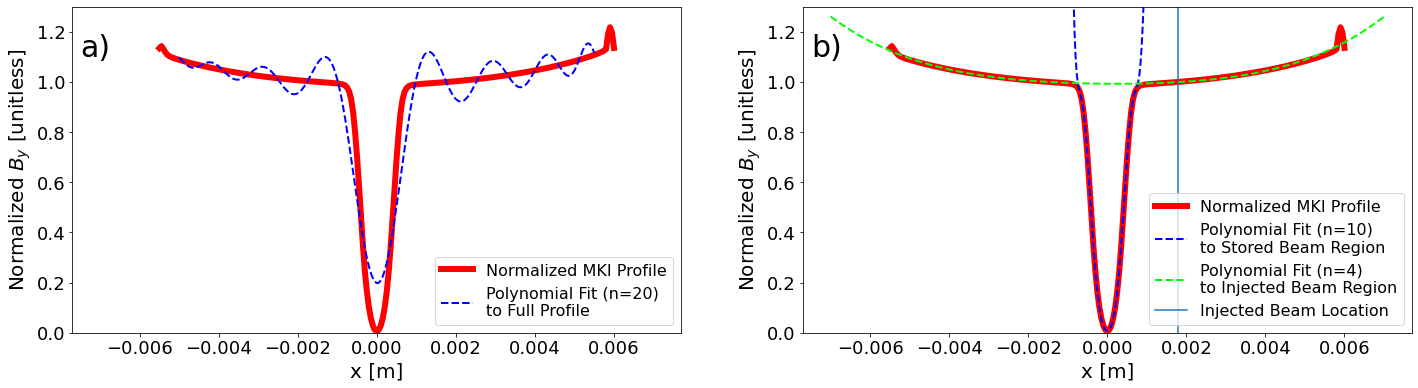

In [10]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(24,6),sharex=True)

xrange = np.linspace(-0.007,0.007,1000)
xcenter = np.linspace(-0.00092,0.00092,142)

ax[0].plot(profile_df["x_meters"], profile_df["By_Dip_Tesla_normalised"], linewidth=6, color='red', label="Normalized MKI Profile")
ax[0].plot(profile_df["x_meters"].iloc[10:-10], fitProfile(profile_df["x_meters"].iloc[10:-10]),linewidth=2, color='blue', linestyle = '--', label="Polynomial Fit (n=20)\nto Full Profile")

ax[1].plot(profile_df["x_meters"], profile_df["By_Dip_Tesla_normalised"], linewidth=6, color='red', label="Normalized MKI Profile")
ax[1].plot(xcenter, centerFitProfile(xcenter),linewidth=2, color='blue', linestyle = '--', label="Polynomial Fit (n=10)\nto Stored Beam Region")
ax[1].plot(xrange, kickerFitProfile(xrange),linewidth=2, color='lime', linestyle = '--', label="Polynomial Fit (n=4)\nto Injected Beam Region")

ax[0].set_xlabel("x [m]", fontsize=20)
ax[1].set_xlabel("x [m]", fontsize=20)

ax[0].set_ylabel(r"Normalized $B_y$ [unitless]", fontsize=20)
ax[1].set_ylabel(r"Normalized $B_y$ [unitless]", fontsize=20)



ax[0].tick_params(axis='both', which='major', labelsize=18)
ax[0].set_ylim([0,1.3])

ax[1].tick_params(axis='both', which='major', labelsize=18)
ax[1].set_ylim([0,1.3])

ax[0].text(-0.0075,1.1,"a)",fontsize=30)
ax[1].text(-0.0075,1.1,"b)",fontsize=30)

ax[1].axvline(x=x_injection, label = "Injected Beam Location")
#ax[1].axvline(x=x_injection-5*sigma, linestyle = "--")
#ax[1].axvline(x=x_injection+5*sigma, linestyle = "--")

ax[0].legend(loc='lower right', ncol=1, fontsize=16)
ax[1].legend(loc='lower right', ncol=1, fontsize=16)
plt.show()

In [11]:
L= 0.5 # [m] length of kicker
brho = 45.6e9/3e8 #[Tm] beam rigidity. [GeV/c]/[e]*[c/(3e8 m/s)]=[Vs/m]=[T/m]

KNL=np.zeros(11)

print(f'MKIKICK: HKICKER, L=0.5, KICK:=0.5/BEAM->BRHO * kick_factor *  {math.factorial(0)}*({centerFitProfile[0]}*on_stored_beam + {kickerFitProfile[0]}*on_injected_beam);\n')
centerFitProfile[0] =0
kickerFitProfile[0] =0

print('MKI: MULTIPOLE, LRAD=0.5, KNL:={')
for i in range(0,11,1):
    KNL[i]=L/brho*math.factorial(i)*centerFitProfile[i]
    print(f"{L}/BEAM->BRHO * kick_factor * {math.factorial(i)}*({centerFitProfile[i]}*on_stored_beam + {kickerFitProfile[i]}*on_injected_beam),\n")
print('};')

    

MKIKICK: HKICKER, L=0.5, KICK:=0.5/BEAM->BRHO * kick_factor *  1*(0.00793036668195872*on_stored_beam + 0.9926660175749444*on_injected_beam);

MKI: MULTIPOLE, LRAD=0.5, KNL:={
0.5/BEAM->BRHO * kick_factor * 1*(0.0*on_stored_beam + 0.0*on_injected_beam),

0.5/BEAM->BRHO * kick_factor * 1*(-0.0036314060421102196*on_stored_beam + -1.0776942296458056*on_injected_beam),

0.5/BEAM->BRHO * kick_factor * 2*(1901089.7475940592*on_stored_beam + 2359.9451482834547*on_injected_beam),

0.5/BEAM->BRHO * kick_factor * 6*(22383376.761095483*on_stored_beam + 20730.694699771826*on_injected_beam),

0.5/BEAM->BRHO * kick_factor * 24*(11644282361205.65*on_stored_beam + 63292642.97650673*on_injected_beam),

0.5/BEAM->BRHO * kick_factor * 120*(-804398930908238.1*on_stored_beam + 0*on_injected_beam),

0.5/BEAM->BRHO * kick_factor * 720*(-4.484279154309152e+19*on_stored_beam + 0*on_injected_beam),

0.5/BEAM->BRHO * kick_factor * 5040*(3.2462953733077105e+21*on_stored_beam + 0*on_injected_beam),

0.5/BEAM->BRHO 